In [1]:
import gsw, time, datetime, sys, os, glob, xgcm, matplotlib, xarray as xr, numpy as np, dask.array as da, pandas as pd, cartopy.crs as ccrs
import matplotlib.patches as patches, cmocean
from scipy import signal, fft
import xrft
import cartopy.mpl.ticker as cticker, string
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm, TwoSlopeNorm
import matplotlib.pyplot as plt, matplotlib.colors as colors, matplotlib.dates as mdates

In [23]:
import numpy as np
import xarray as xr
import pandas as pd

# Load the .dat file
data_path = "/home/fcampos/Downloads/rossrad.dat"
data = np.loadtxt(data_path)

# Extract columns: latitude, longitude, phase speed (c), Rossby radius (Lr)
lat = data[:, 0]
lon = data[:, 1]
c = data[:, 2]
Lr = data[:, 3]

# Get unique latitude and longitude values
unique_lat = np.unique(lat)
unique_lon = np.unique(lon)
nlat = len(unique_lat)
nlon = len(unique_lon)

# Initialize grids with NaN to represent missing values (typically land points)
c_grid = np.full((nlat, nlon), np.nan)
Lr_grid = np.full((nlat, nlon), np.nan)

# Create dictionaries to map lat/lon values to grid indices
lat_idx = {val: i for i, val in enumerate(unique_lat)}
lon_idx = {val: j for j, val in enumerate(unique_lon)}

# Fill the grids with available data
for i in range(len(lat)):
    ilat = lat_idx[lat[i]]
    ilon = lon_idx[lon[i]]
    c_grid[ilat, ilon] = c[i]
    Lr_grid[ilat, ilon] = Lr[i]

# Create an xarray Dataset
ds = xr.Dataset(
    {
        "phase_speed": (["lat", "lon"], c_grid),
        "rossby_radius": (["lat", "lon"], Lr_grid)
    },
    coords={
        "lat": unique_lat,
        "lon": unique_lon
    }
)

# Save the dataset to a NetCDF file (optional)
netcdf_path = "/home/fcampos/Downloads/rossrad.nc"
ds.to_netcdf(netcdf_path)


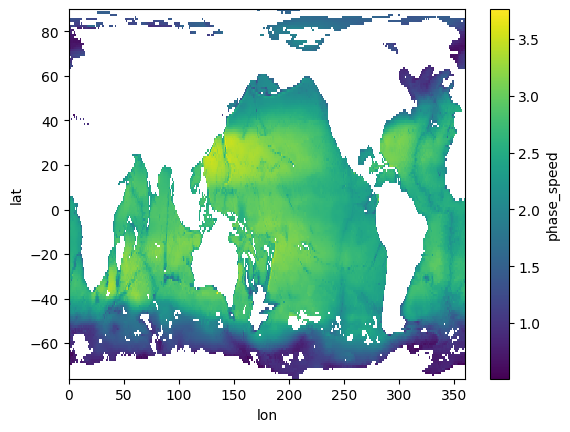

In [24]:
ds.phase_speed.plot()

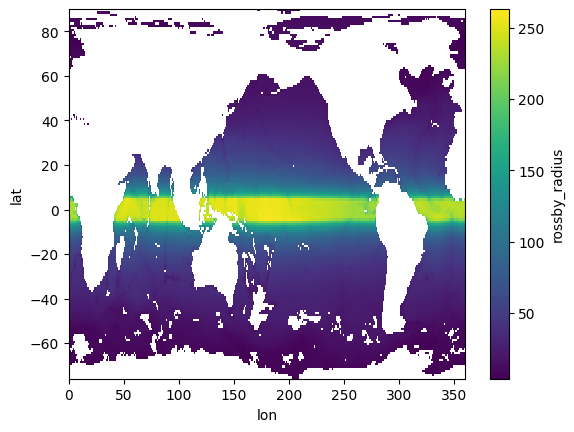

In [26]:
ds.rossby_radius.plot()

In [27]:
pwd

'/media/fcampos/DATA_SAVE/data_fernando'